## Libaries

In [1]:
# Main libraries installation
!pip install geopandas requests > nul

In [2]:
# Import necessary libraries
import geopandas as gpd  # Import the GeoPandas library for working with geospatial data
from shapely.geometry import Point  # Import the Point class from the Shapely library for geometric objects
import pandas as pd  # Import the pandas library for data manipulation and analysis
import os  # Import the os library for operating system-related functionality
import osmnx as ox  # Import the osmnx library for working with OpenStreetMap data
import plotly.graph_objects as go  # Import the graph_objects module from Plotly for creating interactive visualizations
import io  # Import the io library for input/output operations
import rasterio  # Import the rasterio library for working with raster data
import numpy as np  # Import the NumPy library for numerical operations
from owslib.wfs import WebFeatureService  # Import WebFeatureService class from owslib for handling Web Feature Service
import matplotlib.pyplot as plt  # Import the pyplot module from the matplotlib library for creating visualizations
from mpl_toolkits.basemap import Basemap  # Import the Basemap class for creating basemaps
import requests  # Import the requests library for making HTTP requests
from io import BytesIO  # Import BytesIO class from io for handling binary data in-memory
import contextily as cx  # Import the contextily library for basemaps and context tiles
import plotly.express as px  # Import the express module from Plotly for creating interactive visualizations
import json  # Import the json library for handling JSON data
import plotly.io as pio  # Import the Plotly I/O library for handling Plotly I/O
from IPython.display import Image  # Import the Image class from IPython.display for displaying images in the IPython environment
import warnings  # Import the warnings library for managing warnings

# Set display option to show all columns in pandas DataFrame
pd.options.display.max_columns = None

# Disable deprecation warnings to suppress unnecessary warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Ingestion

In [3]:
# Read the real estate data from the CSV file into a Pandas DataFrame
df_property = pd.read_csv('data/real_estate_data.csv')

## Data exploring

In [4]:
# Display the first few rows of the real estate data DataFrame for a quick overview
df_property.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964329,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [5]:
# Get the unique values in the 'state_name' column of the real estate data DataFrame
unique_states = df_property['state_name'].unique()

In [6]:
# Create a new DataFrame 'prop_ba' by filtering rows where 'state_name' is 'Capital Federal'
prop_ba = df_property[df_property['state_name'] == 'Capital Federal']

In [7]:
# Display information about the structure and data types of the 'prop_ba' DataFrame
prop_ba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  32316 non-null  int64  
 1   operation                   32316 non-null  object 
 2   property_type               32316 non-null  object 
 3   place_name                  32316 non-null  object 
 4   place_with_parent_names     32316 non-null  object 
 5   country_name                32316 non-null  object 
 6   state_name                  32316 non-null  object 
 7   geonames_id                 31030 non-null  float64
 8   lat-lon                     23770 non-null  object 
 9   lat                         23770 non-null  float64
 10  lon                         23770 non-null  float64
 11  price                       29018 non-null  float64
 12  currency                    29018 non-null  object 
 13  price_aprox_local_currency  29

In [8]:
# Create a GeoDataFrame 'gdf' from the DataFrame 'prop_ba' with geometry based on lon and lat columns
gdf = gpd.GeoDataFrame(prop_ba, geometry=gpd.points_from_xy(prop_ba.lon, prop_ba.lat), crs={"init": "epsg:4326"})

c:\Program Files\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
# Create a Mapbox scatter plot using Plotly Express with specific settings
fig = px.scatter_mapbox(
    gdf,
    lat=gdf.geometry.y,  # Extract latitude from the geometry column
    lon=gdf.geometry.x,  # Extract longitude from the geometry column
    color='property_type',  # Color points based on the 'property_type' column
    color_continuous_scale='inferno',  # Set the color scale to 'inferno'
    mapbox_style="open-street-map",  # Set the Mapbox style to 'open-street-map'
    zoom=5,  # Set the initial zoom level
)

# Display the map
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})  # Adjust the layout margins
fig.show()

## 'Buenos Aires City' Data Ingestion

In [10]:
# Define the WFS URL, version, and create a WebFeatureService instance
wfs_url5 = 'https://geoservicios.indec.gov.ar/geoserver/wfs'
ver5 = '2.0.0'
wfs5 = WebFeatureService(url=wfs_url5, version=ver5)

# Retrieve geospatial data from the WFS as GeoJSON
response5 = wfs5.getfeature(typename='sig:v_provincias', outputFormat='application/json')
data5 = response5.read()

# Convert the data to a Python dictionary
data5 = json.loads(data5)

# Save the data to a temporary GeoJSON file
with open('data/temp5.geojson', 'w') as geojson_file:
    json.dump(data5, geojson_file)

# Load the data from the GeoJSON file into a GeoDataFrame
gdf5 = gpd.read_file('data/temp5.geojson')

# Set a Coordinate Reference System (CRS) for the GeoDataFrame
gdf5 = gdf5.set_crs(22193, allow_override=True)

ERROR:fiona._env:PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\15\share\contrib\postgis-3.3\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 0 whereas a number >= 2 is expected. It comes from another PROJ installation.
ERROR:fiona._env:PROJ: proj_identify: C:\Program Files\PostgreSQL\15\share\contrib\postgis-3.3\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 0 whereas a number >= 2 is expected. It comes from another PROJ installation.


In [11]:
# Create a new GeoDataFrame 'gdf_caba' by filtering rows where 'nombre' is 'Ciudad Autónoma de Buenos Aires'
gdf_caba = gdf5[gdf5['nombre'] == 'Ciudad Autónoma de Buenos Aires']
gdf_caba

,id,nombre,desde,hasta,estilo_id,link,fuente_id,toponimo_id,geometry
22,v_provincias.fid--5973a26e_18cb193512c_2527,Ciudad Autónoma de Buenos Aires,None,None,1,02,4,106595,"POLYGON ((4195139.000 6138646.000, 4195122.500..."


In [12]:
# Convert the GeoDataFrame to the desired CRS (CRS 4326 - WGS 84 for Mapbox)
gdf_caba = gdf_caba.to_crs(epsg=4326)

# Calculate the centroid of the polygon
centroid_lat = gdf_caba.geometry.centroid.y.mean()
centroid_lon = gdf_caba.geometry.centroid.x.mean()

# Create a choropleth Mapbox map centered on the centroid
fig = px.choropleth_mapbox(
    gdf_caba,
    geojson=gdf_caba.geometry,
    locations=gdf_caba.index,
    color='nombre',
    color_continuous_scale='Greens_r',
    mapbox_style="open-street-map",
    center={"lat": centroid_lat, "lon": centroid_lon},
    zoom=10,
)

# Display the map
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16884\719050042.py:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16884\719050042.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




## Spatial Intersection (transformative join)

In [13]:
# Create a copy of the GeoDataFrame 'gdf_caba' named 'caba_gdf'
caba_gdf = gdf_caba.copy()

# Reproject 'caba_gdf' to the desired CRS (CRS 4326 - WGS 84)
caba_gdf = caba_gdf.to_crs(epsg=4326)

In [14]:
# Perform a spatial overlay between two GeoDataFrames ('gdf' and 'caba_gdf') to get their intersection
result = gpd.overlay(gdf, caba_gdf, how='intersection')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16884\2146386863.py:2: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326




In [15]:
# Convert the GeoDataFrame 'result' to the desired CRS (CRS 4326 - WGS 84 for Mapbox)
result = result.to_crs(epsg=4326)

# Calculate the centroid of the points for map centering
centroid_lat = result.geometry.y.mean()
centroid_lon = result.geometry.x.mean()

# Create a scatter Mapbox map using Plotly Express
fig = px.scatter_mapbox(
    result,
    lat=result.geometry.y,
    lon=result.geometry.x,
    color='property_type',
    color_continuous_scale='gist_earth',
    mapbox_style="open-street-map",
    center={"lat": centroid_lat, "lon": centroid_lon},
    zoom=10,
)

# Display the map
fig.show()

## Case: Governmet Solution

The Buenos Aires City Government has informed us that they will be opening a new gastronomic hub 6 blocks away from the 'Congreso del Tucumán' subway station. In response, the manager has requested a report on the number of apartments we have within an 800-meter radius of that station.

In [16]:
# Specify the name of the city or area of interest
city = "Ciudad Autónoma de Buenos Aires"

# Download OSM data using Overpass API for subway stations
tags = {"railway": "station", "network": "Subte"}
gdfs = ox.features_from_place(city, tags)

# Filter and create a GeoPandas DataFrame with relevant data
gdf_subway = gdfs[gdfs['railway'] == 'station']

# Define the appropriate coordinate system (EPSG) for your area
gdf_subway.crs = 'EPSG:4326'  # WGS 84 latitude/longitude

# Reset the index
gdf_subway = gdf_subway.reset_index()

# Filter only Point geometries
gdf_subway = gdf_subway[gdf_subway['geometry'].geom_type == 'Point']

# Filter for subway stations named 'Congreso de Tucumán'
gdf_subway = gdf_subway[gdf_subway['station'] == 'subway']
gdf_subway = gdf_subway[gdf_subway['name'] == 'Congreso de Tucumán']

In [17]:
# Coordinates of the subway station (assuming it's the first row in 'gdf')
station = gdf_subway.copy()

# Set a Coordinate Reference System (CRS) for the GeoDataFrame
station = station.set_crs(4326, allow_override=True)

In [18]:
# Define the buffer radius in meters (800 meters in this case)
buffer_radius = 0.007199294469

# Create a new column in the GeoDataFrame with the buffer
station['buffer'] = station.geometry.buffer(buffer_radius)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16884\1992710154.py:5: UserWarning:

Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [19]:
# Create a new GeoDataFrame with the buffers
gdf_buffered = station.copy()

# Drop the existing "geometry" column
gdf_buffered = gdf_buffered.drop(columns=['geometry'])

# Rename the "buffer" column to "geometry"
gdf_buffered = gdf_buffered.rename(columns={'buffer': 'geometry'})

In [20]:
# Add a new column 'info' to the GeoDataFrame with the value 'buffer 800 mt'
gdf_buffered['info'] = 'buffer 800 mt'

In [21]:
# Reproject the GeoDataFrame to its original reference system if necessary
gdf_buffered = gdf_buffered.to_crs(epsg=4326)

# Adjust the zoom to change the map resolution
zoom_level = 14
fig = px.choropleth_mapbox(gdf_buffered,
                           geojson=gdf_buffered.geometry.__geo_interface__,
                           locations=gdf_buffered.index,
                           color='info',
                           hover_data=['info', 'station'],
                           mapbox_style="carto-positron",
                           center={"lat": gdf_buffered.geometry.centroid.y.mean(), "lon": gdf_buffered.geometry.centroid.x.mean()},
                           zoom=zoom_level)

# Add transparency to the polygon
fig.update_traces(marker=dict(opacity=0.3, line=dict(width=0.5, color='White')))

# Add the Eiffel Tower point
scatter_trace = px.scatter_mapbox(gdf_subway,
                                  lat=gdf_subway.geometry.y,
                                  lon=gdf_subway.geometry.x,  # Name of the longitude column
                                  text="name")  # Name of the column for text

# Update the point marker
scatter_trace.update_traces(marker=dict(color='red', size=10))

# Add the point to the plot
fig.add_trace(scatter_trace.data[0])

# Hide the index on the map
fig.update_layout(mapbox_layers=[{
    'below': 'traces',
    'sourcetype': 'geojson',
    'source': gdf_buffered.geometry.__geo_interface__,
    'type': 'fill',
    'color': 'rgba(0,0,0,0)'  # Transparent color
}])

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16884\2965557977.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




### Intersection with apartments

In [22]:
# Perform the intersection between the two GeoDataFrames
result_subway = gpd.overlay(result, gdf_buffered, how='intersection')

In [23]:
# Filter the GeoDataFrame to include only rows where 'property_type' is 'apartment'
result_subway = result_subway[result_subway['property_type'] == 'apartment']

In [24]:
# Convert GeoDataFrames to the desired CRS (EPSG:4326 - WGS 84 for Mapbox)
gdf_buffered = gdf_buffered.to_crs(epsg=4326)
result_subway = result_subway.to_crs(epsg=4326)

# Create a choropleth map with Mapbox
fig = px.choropleth_mapbox(
    gdf_buffered,
    geojson=gdf_buffered.geometry,
    locations=gdf_buffered.index,
    color='name',  # Adjust this to the correct column in your data
    hover_data=['name'],
    mapbox_style="carto-positron",
    center={"lat": gdf_buffered.geometry.centroid.y.mean(), "lon": gdf_buffered.geometry.centroid.x.mean()},
    zoom=14,
)

# Add transparency to the polygon
fig.update_traces(marker=dict(opacity=0.3, line=dict(width=0.5, color='White')))

# Add points to the map
scatter_trace = px.scatter_mapbox(
    result_subway,
    lat=result_subway.geometry.y,
    lon=result_subway.geometry.x,
    text='title',  # Adjust this to the correct column in your data
)

# Update the point marker
scatter_trace.update_traces(marker=dict(color='lightgreen', size=10), line=dict(width=0.5, color='brown'))

# Add points to the map
fig.add_trace(scatter_trace.data[0])

# Configure the map layout
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16884\3955677912.py:13: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




## Data Visualization

In [25]:
# Convert GeoDataFrames to the desired CRS (EPSG:4326 - WGS 84 for Mapbox)
gdf_buffered = gdf_buffered.to_crs(epsg=4326)
result_subway = result_subway.to_crs(epsg=4326)

# Create a density map with Mapbox using Plotly Express
fig = px.density_mapbox(
    result_subway,
    lat=result_subway.geometry.y,
    lon=result_subway.geometry.x,
    z='price_per_m2',  # Adjust this to the correct column in your data
    radius=10,  # Radius of the points
    center={"lat": result_subway.geometry.centroid.y.mean(), "lon": result_subway.geometry.centroid.x.mean()},
    zoom=13,
    mapbox_style="carto-positron",
    title='Price per m2 Heatmap in 800m Buffer Zone around Congreso del Tucumán Station'
)

# Add points to the map
scatter_trace = px.scatter_mapbox(
    gdf_subway,
    lat=gdf_subway.geometry.y,
    lon=gdf_subway.geometry.x,
    text="name"  # Name of the column for text
)

# Update the point marker
scatter_trace.update_traces(marker=dict(color='red', size=10))

# Add points to the plot
fig.add_trace(scatter_trace.data[0])

# Hide the index on the map
fig.update_layout(mapbox_layers=[{
    'below': 'traces',
    'sourcetype': 'geojson',
    'source': gdf_buffered.geometry.__geo_interface__,
    'type': 'fill',
    'color': 'rgba(0,0,0,0)'  # Transparent color
}])

fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16884\117311925.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [26]:
# Assuming 'fig' is your Plotly figure
pio.write_html(fig, 'data/geoanalytics.html')

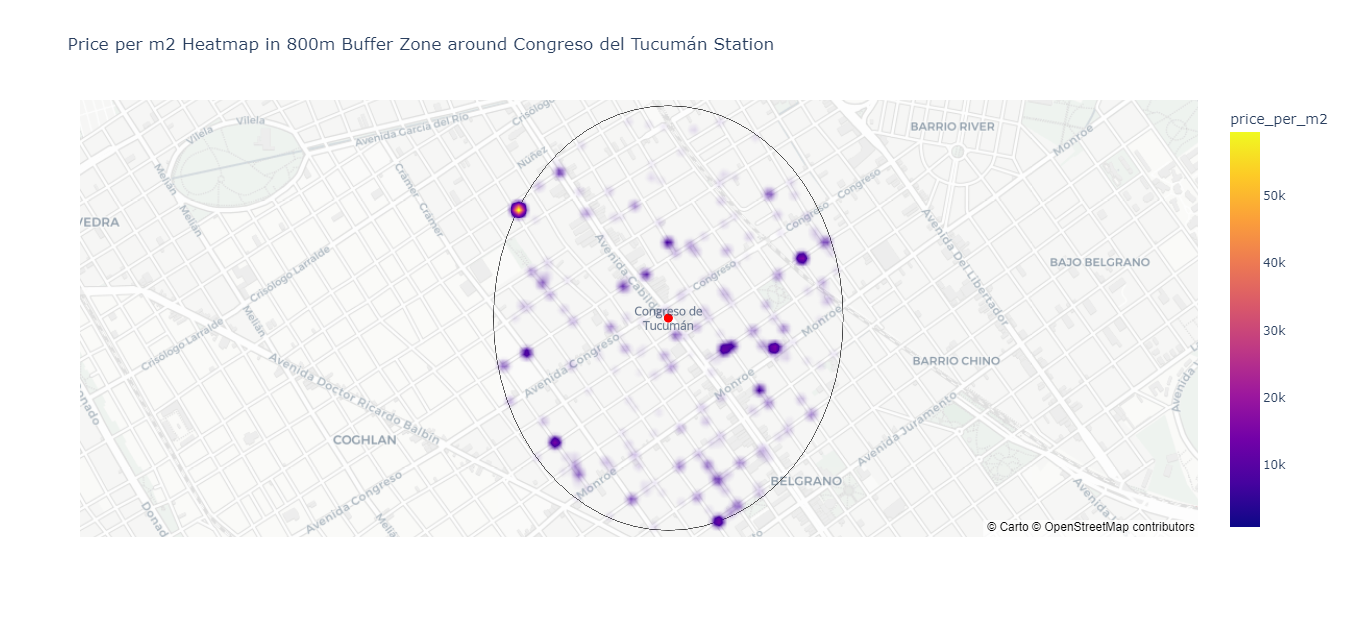

In [27]:
# Path to your PNG file
ruta_archivo_png = 'data/geoanalytics.png'  # Replace with the correct path

# Display the image in the notebook
Image(filename=ruta_archivo_png)